In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
os.chdir("D:\swap engg\B.Tech Project\Final year project\Code\Fake-Job-Posting-Prediction-master")

In [21]:
fake_job_postings = pd.read_csv('data/fake_job_postings_cleaned.csv')

In [22]:
X = fake_job_postings[['telecommuting', 'ratio', 'text', 'character_count']]
y = fake_job_postings['fraudulent']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [24]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]

In [25]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.text)
tfidf_test = tfidf_vectorizer.transform(X_test.text)

In [27]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)


0.971395881006865

In [29]:
metrics.f1_score(y_test, pred)

0.7435897435897436

In [30]:
from sklearn.linear_model import SGDClassifier

clf_log = SGDClassifier(loss='log').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.977116704805492

In [31]:
clf_num = SGDClassifier(loss='log').fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.06607551487414187

In [32]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [33]:
metrics.accuracy_score(y_test, prediction_array)

0.06607551487414187

In [34]:
metrics.f1_score(y_test, prediction_array)

0.12396028977730077

In [35]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

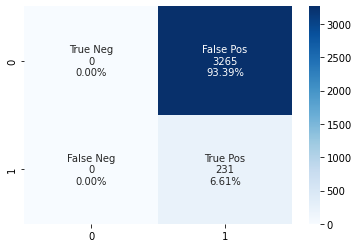

In [36]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [37]:
len(y_test[y_test == 0]), len(y_test[y_test == 1])

(3265, 231)

In [38]:
# new=pd.Series(["We're pasionate aboutprove how companies think about their design process. "])
# count_train = count_vectorizer.fit_transform(X_train.text.values)
# count_test = count_vectorizer.transform(new)
# nb_classifier = MultinomialNB()
# nb_classifier.fit(count_train, y_train)
# pred = nb_classifier.predict(count_test)
# print(pred)


### use pipleine to predict

# new = pd.Series([938,"Health & Environmental Professional",
# "US, CA, Bakersfield","Refined Resources","70000-120000",
#                  "Aptitude Staffing Solutions has redesigned the recruiting wheel. Our innovative new platform cuts the recruiting time in half, yields scientifically-proven results and clients and candidates enjoy a pleasant experience through advanced, simple to use technology and a tenured, industry-experienced recruiting team. Join us in a fresh new experience of leveraging your career...the way it should be!Â All represented candidates enjoy the following perks:Expert negotiations, maximizing total compensation packageÂ Signing bonus by Aptitude Staffing in addition to client signing bonus (if applicable)1 Year access to AnyPerkRelocation Services for out of town candidatesContinued education in your area of profession, seminars, workshops and other skill development eventsÂ Contract employees receive quarterly bonuses for the duration of their projectÂ Direct-Hire employees receive double bonues ($2,000) per referred/recruited candidate into their newly appointed companyAll candidates are encouraged to participate in ourÂ Referral Bonus ProgramÂ &amp; earnÂ $500 - $1,000Â per hired referralÂ  Â  Â  Â  Â  Â Â ",
# "Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â Â",
#                  "Responsibilities:Duties and Responsibilities:Makes recommendations and implements programs for handling environmental issues in full compliance with applicable regulations.Application of ISO 14000 Environmental Management Systems.Produces written documents with clearly organized thoughts using proper sentence construction, punctuation, and grammar.Enter data or information into a computerized maintenance management system.Work safely and communicate a commitment to work safely to others.Be the environmental champion and liaison with:PersonnelContractorsConsultantsRegulatory agency representativesManages the Environmental Compliance Action Plan.Ensures environmental records management process meets agency requirements and uses resources effectively.Regularly performs Process Hazard Analysis and participates in investigations.Manages projects and timely communicates problems and achievements.Meets regularly with employees and contractors.Oversees and performs environmental inspections, audits, and sampling.Ensures appropriate environmental training is completed.Assists in completing and submitting agency submissions.Assists in the review and reporting of the impact of environmental regulatory change on the business.Demonstrates focus on continuous improvement and environmental sustainability systems.Participates in the HES Committee.Qualifications:Minimum Education, Knowledge &amp; Experience:Bachelorâ€™s degree in Environmental Science, Environmental Engineering, Environmental Planning, or a related field (biology, geology, hydrology, chemistry, natural resources, etc.). Another degree may be acceptable with experience in environmental compliance.Minimum of three plus (3+) years of professional level experience in the field of environmental compliance is required.Demonstrable experience in the application of environmental laws/regulations.Experience with the following agencies and programs is highly desirable:SJVACD, CARB, BLM, DOGGR, EPA.Hazardous and non-hazardous waste, air permitting and testingÂ Â  (Title V), wastewater disposal, spill response (SPCC), biological surveys, and resource management.Has or is working toward an environmental certification listed by NREP is highly desirable.Knowledge and prior use of Microsoft Office programs including intermediate knowledge of Microsoft Excel, Power Point, and Word. Microsoft SharePoint experience is a plus."

#                  ,
#                  "a",
                 
# 0,
# 1,
# 1,
# "Full-time",
# "Mid-Senior level",
# "Bachelor's Degree",
# "Oil & Energy",
# "Other"

# ])
# count_train = count_vectorizer.fit_transform(X_train.text.values)
# count_test = count_vectorizer.transform(new)
# nb_classifier = MultinomialNB()
# nb_classifier.fit(count_train, y_train)
# pred=nb_classifier.predict(count_test)
# print(pred)
